In [1]:
#Imports
import sys
sys.path.append('../python/')
import NGC5533_functions as nf

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import lmfit as lm
import dataPython as dp

from datetime import datetime
import time as t

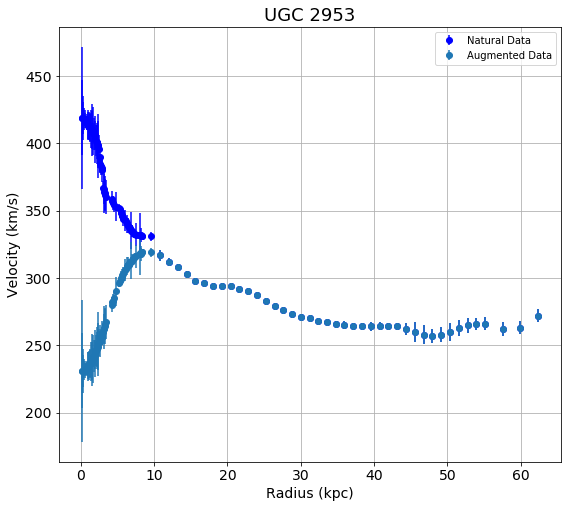

In [2]:
starttime = t.time()

data = dp.getXYdata_wYerr('../Rotation_Velocities/UGC2953.txt')
r_dat = np.asarray(data['xx'])
v_dat = np.asarray(data['yy'])
#v_err0 = np.asarray(data['ex'])
v_err1 = np.asarray(data['ey'])

data2 = dp.getXYdata_wYerr('../Rotation_Velocities/UGC2953_aug.txt')
r_dat2 = np.asarray(data2['xx'])
v_dat2 = np.asarray(data2['yy'])
#v_err0 = np.asarray(data['ex'])
v_err2 = np.asarray(data2['ey'])


# Plotting Rotational Velocities

fig = plt.figure(figsize=(9.0,8.0))
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')


plt.errorbar(r_dat2,v_dat2,yerr=v_err2,fmt='bo',label='Natural Data')
plt.errorbar(r_dat,v_dat,yerr=v_err1,fmt='o',label='Augmented Data')



ax.set_title('UGC 2953', fontsize=18)             
ax.set_xlabel('Radius (kpc)', fontsize=14)
ax.set_ylabel('Velocity (km/s)', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14);

plt.legend()
plt.show()

In [3]:
#fitting for low bh

def g(r,M):
    return np.sqrt(nf.bh_v(r,M,load=False)**2 
                   + nf.h_v(r,load=True)**2 
                   + nf.b_v(r,load=True)**2 )
                   #+ nf.d_v(r,load=True)**2)


weighdata = (1/v_err1)
# Fit, using prefactors

#Setup
g_mod = lm.Model(g)
g_params = g_mod.make_params()
#Black Hole
g_params.add('M', value=nf.Mbh_def, min=0.0) #Mass
#Halo
#g_params.add('rc', value=nf.h_rc, min=0.1)   #Radius (magnitude)
#g_params.add('rho00', value=nf.hrho00_c, min=0) #Density (halo)


#Do fit
g_fit = g_mod.fit(v_dat,g_params,r=r_dat,weights=weighdata, nan_policy="omit")


bestg = g_fit.best_fit
delg = g_fit.eval_uncertainty()

In [4]:
print('Natural')
g_fit

Natural


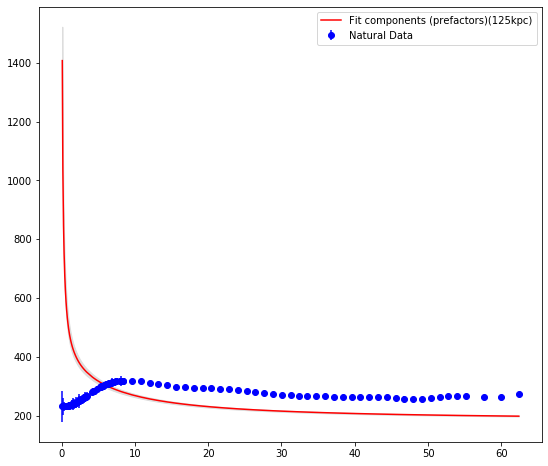

In [5]:
#Plot to 110kpc

fig = plt.figure(figsize=(9.0,8.0))

plt.errorbar(r_dat,v_dat,yerr=v_err1,fmt='bo',label='Natural Data')
#plt.plot(r_dat,g(r_dat,nf.Mbh_def,nf.h_rc,nf.hrho00_c,1,1),label='Total Curve (Default)')
plt.plot(r_dat,bestg,'r-',label='Fit components (prefactors)(125kpc)')
plt.fill_between(r_dat,bestg-delg,bestg+delg,color='#dddddd')

plt.legend()
plt.savefig('Fitting_allcomponents_125kpc.png')
plt.show()

In [6]:
#fitting for high bh

def g(r,M):
    return np.sqrt(nf.bh_v(r,M,load=False)**2 
                   + nf.h_v(r, load=True)**2 
                   + nf.b_v(r,load=True)**2 )
                   #+ nf.d_v(r,load=True)**2)


weighdata = (1/v_err2)
# Fit, using prefactors

#Setup
g_mod = lm.Model(g)
g_params = g_mod.make_params()
#Black Hole
g_params.add('M', value=nf.Mbh_def, min=0) #Mass
#Halo
#g_params.add('rc', value=nf.h_rc, min=0.1, vary=False)   #Radius (magnitude)
#g_params.add('rho00', value=nf.hrho00_c, min=0) #Density (halo)


#Do fit
g_fit = g_mod.fit(v_dat2,g_params,r=r_dat2,weights=weighdata)


bestg = g_fit.best_fit
delg = g_fit.eval_uncertainty()

In [7]:
print('Aug')
g_fit

Aug


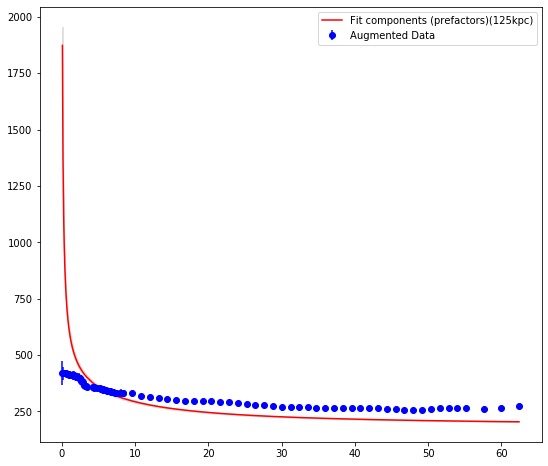

In [8]:
#Plot to 110kpc

fig = plt.figure(figsize=(9.0,8.0))

plt.errorbar(r_dat2,v_dat2,yerr=v_err2,fmt='bo',label='Augmented Data')
#plt.plot(r_dat,g(r_dat,nf.Mbh_def,nf.h_rc,nf.hrho00_c,1,1),label='Total Curve (Default)')
plt.plot(r_dat,bestg,'r-',label='Fit components (prefactors)(125kpc)')
plt.fill_between(r_dat,bestg-delg,bestg+delg,color='#dddddd')

plt.legend()
plt.savefig('Fitting_allcomponents_125kpc.png')
plt.show()

In [9]:
endtime = t.time()     #put this at end of code
print('Total Time:')
runtime = endtime - starttime

if runtime<=60:
    minutes, runtime= divmod(runtime, 60)
    print(str(round(runtime))+'s')
elif runtime>60 and runtime<=3600:
    minutes, runtime= divmod(runtime, 60)
    print(str(round(minutes))+'min', str(round(runtime))+'s')
elif runtime>3600 and runtime<=86400:
    minutes = runtime/60
    hours, minutes= divmod(minutes, 60)
    print(str(round(hours))+'hrs', str(round(minutes))+'min')
elif runtime>86400:
    hours = runtime/3600
    days, hours= divmod(hours, 24)
    print(str(round(days))+'days', str(round(hours))+'hrs')

Total Time:
2s
